In [95]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from textblob import TextBlob

In [96]:
posts_file_path = os.path.join('..', 'data', 'raw', "The_Donald_weeks_6.json")
posts_df = pd.read_json(posts_file_path)

In [97]:
pd.set_option('display.max_columns', None)
posts_df.head(n=5)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,updated_utc,url,whitelist_status,wls,author_flair_template_id,author_flair_text_color,link_flair_template_id,link_flair_text,link_flair_css_class,author_flair_background_color,media,media_embed,secure_media,secure_media_embed,media_metadata,author_cakeday,banned_by,edited,gilded
0,[],0.0,rprobens,None,[],None,text,t2_11al1m,0.0,False,False,1565153903,i.redd.it,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f7h,False,False,False,True,True,False,False,,[],dark,text,False,False,True,4,0,False,no_ads,/r/The_Donald/comments/cn1f7h/i_would_rather_h...,False,image,"{'enabled': True, 'images': [{'id': 'Y9BzcXurs...",0.0,1565153904,64,,True,False,False,The_Donald,t5_38unr,773793,public,https://b.thumbs.redditmedia.com/ARhUY8JcNlFvW...,140.0,140.0,I would rather have a colonoscopy over Beto an...,0,1.565240e+09,https://i.redd.it/48cq484mkye31.jpg,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],0.0,TexasHunter,MURICA,[],AMERICA FIRST,text,t2_cex15,0.0,False,False,1565153882,i.imgur.com,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f3a,False,False,False,False,True,False,False,,[],dark,text,False,False,True,3,0,False,no_ads,/r/The_Donald/comments/cn1f3a/plain_and_simple/,False,image,"{'enabled': True, 'images': [{'id': 'hRtzZcb-Q...",0.0,1565153883,88,,True,False,False,The_Donald,t5_38unr,773793,public,https://b.thumbs.redditmedia.com/449GTdij8Nzhs...,140.0,140.0,Plain and Simple,0,1.565240e+09,https://i.imgur.com/GnoYvP0.jpg,no_ads,0.0,3d907e20-7f98-11e8-bf2e-0e9529ef79a8,dark,c603faee-3105-11e7-a557-0eb24c32e958,♥ 2nd AMENDMENT ♥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],0.0,pilkyton,None,[],None,text,t2_4a13s1mr,0.0,False,False,1565153876,i.redd.it,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f1q,False,False,False,True,True,False,False,,[],dark,text,False,False,True,3,0,False,no_ads,/r/The_Donald/comments/cn1f1q/reddit_bigut_noz...,False,NaN,NaN,0.0,1565153877,2,,True,False,False,The_Donald,t5_38unr,773793,public,default,NaN,NaN,REDDIT = BIGUT NOZIS CONFIRMED. People of all ...,0,1.565240e+09,https://i.redd.it/w5qe3yygkye31.png,no_ads,0.0,NaN,NaN,d02a7e1c-3105-11e7-b0f3-0e033664e418,🐂RidiculousBullshit💩,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],0.0,Bdix23,None,[],None,text,t2_9cvd5,0.0,False,False,1565153872,self.The_Donald,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f0u,False,False,False,False,True,True,False,,[],dark,text,False,False,True,7,0,False,no_ads,/r/The_Donald/comments/cn1f0u/i_need_your_help...,False,NaN,NaN,0.0,1565153873,20,So a while back I came across a crisis actor v...,True,False,False,The_Donald,t5_38unr,773793,public,self,NaN,NaN,I need your help boys,0,1.565240e+09,https://www.reddit.com/r/The_Donald/comments/c...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],0.0,GoochSpelunker,kekistan,[],KEK,text,t2_16cwjj,0.0,False,False,1565153865,youtu.be,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1ezq,False,False,False,False,True,False,False,,[],dark,text,False,False,True,8,0,False,no_ads,/r/The_Donald/comments/cn1ezq/awkward_referenc...,False,NaN,NaN,0.0,1565153865,20,,True,False,False,The_Donald,t5_38unr,773793,public,default,NaN,NaN,Awkward reference to Q on Jimmy Fallon last ni..

In [98]:
posts_df['created_date'] = pd.to_datetime(
    posts_df['created_utc'].apply(
        lambda x: None if np.isnan(x) else datetime.fromtimestamp(x)),
    errors='coerce')

posts_df['created_date'] = posts_df['created_date'].dt.date

In [99]:
print(posts_df.created_date.min())
print(posts_df.created_date.max())

2019-05-14
2019-08-06


In [100]:
posts_df.set_index('created_date', inplace=True)

In [101]:
# posts_df['post_type'] = posts_df['selftext'].apply(lambda x: (x not in ['[removed]', '']) & (~pd.isnull(x)))
posts_df['post_type'] = np.select(
    [
        posts_df['selftext'] == '[removed]', 
        posts_df['selftext'] == '[deleted]', 
        posts_df['selftext'] == '',
        pd.isna(posts_df['selftext']) 
    ], 
    [
        'removed', 
        'deleted',
        'blank',
        'nan'
    ], 
    default='extant'
)
posts_df[['post_type', 'selftext']]

,post_type,selftext
created_date,,
2019-08-06,blank,
2019-08-06,blank,
2019-08-06,blank,
2019-08-06,extant,So a while back I came across a crisis actor v...
2019-08-06,blank,
...,...,...
2019-05-14,blank,
2019-05-14,blank,
2019-05-14,blank,


In [102]:
posts_df.groupby('post_type')['post_type'].count() #majority are either removed or blank... need to investigate this for sure

post_type
blank      152701
deleted       431
extant      12013
nan            52
removed      5303
Name: post_type, dtype: int64

In [103]:
#again a huge proportion are blank... the subreddit is banned so technically none of them are publically visible anymore, is this posts that were removed prior to being banned?
posts_by_date = posts_df.groupby('created_date')['post_type'].value_counts().unstack()
posts_by_date.fillna(0, inplace=True)
posts_by_date.head()

post_type,blank,deleted,extant,nan,removed
created_date,,,,,
2019-05-14,123.0,0.0,19.0,0.0,1.0
2019-05-15,2192.0,0.0,139.0,0.0,6.0
2019-05-16,2279.0,2.0,214.0,0.0,10.0
2019-05-17,2198.0,1.0,144.0,1.0,38.0
2019-05-18,1845.0,2.0,147.0,0.0,37.0


<AxesSubplot:xlabel='created_date'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


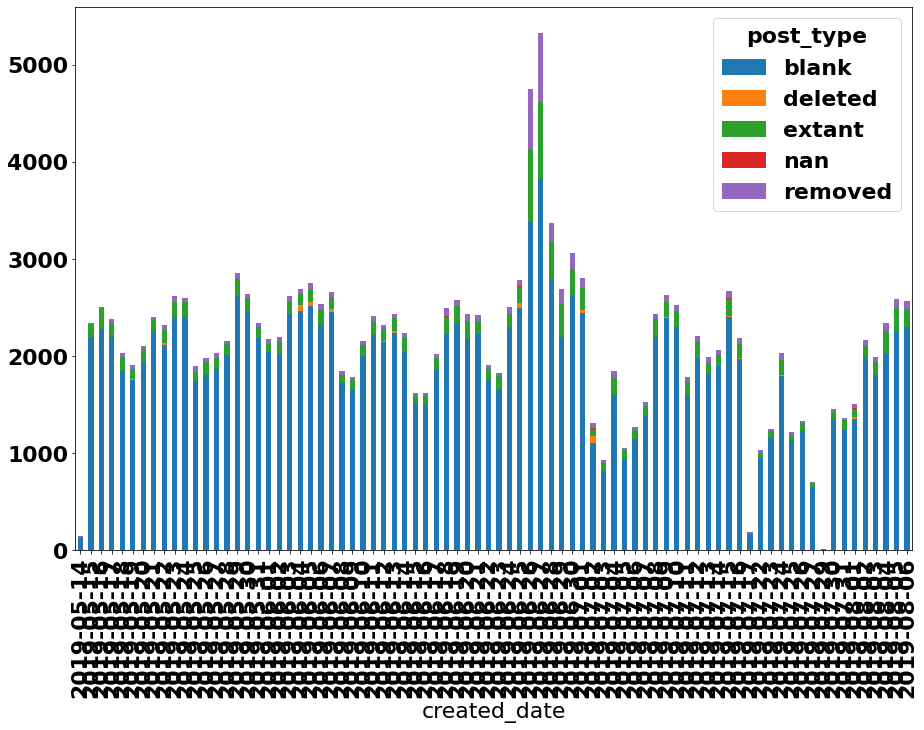

In [118]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = (15,10)

posts_by_date.plot(kind='bar', stacked=True)


In [105]:
extant_posts = posts_df[posts_df['post_type'] == 'extant']
extant_posts['selftext']

created_date
2019-08-06    So a while back I came across a crisis actor v...
2019-08-06    I’m looking to meet other transgender Mexicans...
2019-08-06    [https://www.zerohedge.com/news/2019-08-06/min...
2019-08-06    So a XianXin widget costs CN¥ 6.00 (FOB).  Any...
2019-08-06    I've seen the physical challenges.  \n\nMental...
                                    ...                        
2019-05-14    Recent circumstances led me to post on another...
2019-05-14    If Ronald Reagan and John McCain could meet in...
2019-05-14    Converse just did a "gay pride" ad with the in...
2019-05-14    So, I've always considered myself a libertaria...
2019-05-14                                             HOES MAD
Name: selftext, Length: 12013, dtype: object

In [106]:
curses = TextBlob('Fuck this bullshit. People are assholes and everything they say doesnt mean shit.')
negative_subjective = TextBlob('I hate everything and everything sucks. Everyone is out to get me and its not fair, waaaaaaa')
negative_objective = TextBlob('Country has recorded more than 390,000 new infections and 3,689 deaths over the past 24-hour period')
positive_subjective = TextBlob('I love everything and everything is great. Everyone loves me and and the sun is shining')
positive_objective = TextBlob('Country has added more than 390,000 new jobs and GDP has increased 3 percent per year for a decade')

(curses.sentiment, negative_subjective.sentiment, negative_objective.sentiment, positive_subjective.sentiment, positive_objective.sentiment)

(Sentiment(polarity=-0.3041666666666667, subjectivity=0.6958333333333334),
 Sentiment(polarity=-0.4833333333333334, subjectivity=0.7000000000000001),
 Sentiment(polarity=0.12878787878787878, subjectivity=0.40151515151515155),
 Sentiment(polarity=0.65, subjectivity=0.675),
 Sentiment(polarity=0.3181818181818182, subjectivity=0.4772727272727273))

Polarity ranges from (-1, 1) and subjectivity from (0, 1), so not sure about the ranges but in general the sentiment seems to track relatively well - the negative ones are very different from the positive, but swear words don't seem to immediately indicate negativity - we'll see if thats an issue. Now let's get a post_length feature and polarity/sentiment for each post, so that we can see the extremes in TRP and see if it makes any sense. 

In [107]:
sentiment_test = pd.DataFrame(extant_posts.loc[:,'selftext'].apply(lambda text: tuple(TextBlob(text).sentiment)).tolist())
sentiment_test.index = extant_posts.index
sentiment_test['selftext'] = extant_posts['selftext']
sentiment_test.loc[:,'log10_nword'] = sentiment_test.loc[:,'selftext'].apply(lambda x: math.log10(len(x.split())))
sentiment_test.rename(columns = {0:'sentiment', 1:'objectivity'}, inplace = True)


In general the short posts seem pretty unreliable - let's see if there is a difference among longer posts, like 250 words or more (the long explainer-type posts ideally).

In [108]:
# sentiment_test_long = sentiment_test[sentiment_test['log10_nword'] > math.log10(250)]
sentiment_test_long = sentiment_test
sentiment_test_long.shape

(12013, 4)

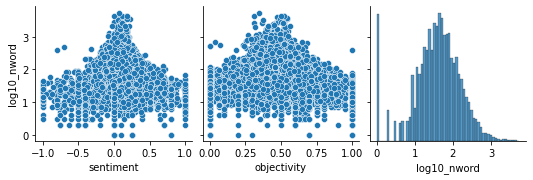

In [117]:
mpl.rcParams['figure.figsize'] = (15,5)
sns.pairplot(sentiment_test_long, y_vars='log10_nword')

Just as we all expected, TRP is generally positive according to textblob. Let's get some of the extreme examples and see what's up. Unsurprisingly, posts with more words are less ambigious in terms of both sentiment and objectivity, so those will probably be most useful to us.  

In [110]:
#high objectivity
sentiment_test_long.sort_values('objectivity' , ascending= False).head(5).apply(lambda row: print(str(row['objectivity']) + ': ' + row['selftext'] + '\n'), axis= 1)

1.0: HOES MAD

1.0: Bernie, Kameltoe and Biden wtf. they are talking about gangs and they want to bring in the presidents of all those countries and do a hat dance.

1.0: Tarrifs only hurt the buyer of the product, not the seller or manufacturer. So why do you guys support the tariffs?

1.0: Just beautiful! #MAGA #Trump2020 #LockUpTheDeepState  [https://twitter.com/GameStopCentral/status/1156725992917876737](https://twitter.com/GameStopCentral/status/1156725992917876737)

1.0: Let's keep POTUS in office. We dont want any of those retards in power.

Here's hoping we can fill another SCOTUS Seat, restore some sanity to law. and pray we dont' get into another war with someone. 

POTUS isn't a warmonger



created_date
2019-05-14    None
2019-06-27    None
2019-06-26    None
2019-07-31    None
2019-07-31    None
dtype: object

In [114]:
#high sentiment
sentiment_test_long.sort_values('sentiment' , ascending= False).head(10).apply(lambda row: print(str(row['sentiment']) + ': ' + row['selftext'] + '\n'), axis= 1)

1.0: I love you all my fellow Pedes/Patriots! Let's keep this Trump Train rolling 🚂 🚂 🚂 2020!!!

1.0:  [https://www.foxnews.com/politics/michigan-rep-justin-amash-quits-gop-says-he-is-frightened-by-party-politics](https://www.foxnews.com/politics/michigan-rep-justin-amash-quits-gop-says-he-is-frightened-by-party-politics) 

&amp;#x200B;

picks perfect day to show he's a turncoat.  Today's Benedict Arnold award recipient...

1.0: Proud to be from St. Louis!!!  One of my dreams has come true.....Now onto seeing Hillary and her cronies going to GITMO!!

1.0: Suspend for 7 days on Twitter for calling Cher a "*ignorant petrified bimbo*"  LOL!

1.0: If you are Democrat republican liberal it doesn’t matter if you are a father happy Father’s Day to you. *Today is your day!*

1.0: ...by the content of their character. She is doing a great job. Thank you, Candace! &lt;3

1.0: We have the best mods, don’t we folks?

1.0: I'M RACIST!!!! COMMENT BELOW IF YOU'RE PROUD TO BE RACIST TOO!!!

1.0: I hop

created_date
2019-06-26    None
2019-07-04    None
2019-06-12    None
2019-06-08    None
2019-06-16    None
2019-07-10    None
2019-08-04    None
2019-06-25    None
2019-06-14    None
2019-06-18    None
dtype: object

In [112]:
#low objectivity
sentiment_test_long.sort_values('objectivity' , ascending= True).head(5).apply(lambda row: print(str(row['objectivity']) + ': ' + row['selftext'] + '\n'), axis= 1)

0.0: From scratch Hershey’s chocolate cake with stabilized whipped cream icing.

0.0: Upvote her in all polls
We need to see her solo debate Trump

0.0: How can we view the list of banned words and domains so we can avoid using them so we aren't just making posts nobody else can see?

0.0: I'm a wall nut too.

0.0: He is doing everything I hoped he would when I cast my vote for him. #MAGA #Trump2020



created_date
2019-07-03    None
2019-06-30    None
2019-07-22    None
2019-06-03    None
2019-06-30    None
dtype: object

In [113]:
#low sentiment
sentiment_test_long.sort_values('sentiment' , ascending= True).head(5).apply(lambda row: print(str(row['sentiment']) + ': ' + row['selftext'] + '\n'), axis= 1)

-1.0: FUCK!!!!!!  God this is the slippery slope.

-1.0: Reddit quarantining T_D and the horrible debate was the Democrat’s Battle Of The Bulge. Oh, and may I remind you how that went...

-1.0: Her behavior is disgusting, and i’m considering asking her to leave.

-1.0: Every post on r/all isn’t even trying to remember the victims/mourn the loss. It’s just hyper-sensitive attacks on President Trump and blaming him for what happened. It’s just disgusting

-1.0: Spirit moved me to join Reddit to post this! 

Celebrate, my deplorable Pedes!

Let's keep the train going and KAGA!!!



created_date
2019-08-06    None
2019-06-28    None
2019-06-01    None
2019-08-04    None
2019-06-19    None
dtype: object